In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import sys
import glob
import os
import datetime

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## Clean Data

In [2]:
all_files = glob.glob('../data/*.csv')
all_files = sorted(all_files)
df = pd.concat([pd.read_csv(files) for files in all_files])
df = df.iloc[:, 0:22]
df['time'] = pd.to_datetime(df['time']).dt.tz_localize(None)
df = df.sort_values('time').reset_index(drop=True)

In [3]:
df.describe()

,Tweet id,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,app opens,app installs,follows,email tweet,dial phone,media views,media engagements
count,1.513000e+03,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.0,1513.0,1513.000000,1513.000000
mean,1.267039e+18,4935.460013,153.633179,0.028149,7.892928,0.532056,24.514871,16.489755,24.462657,0.154660,62.748843,0.002644,0.009253,0.000661,0.015202,0.0,0.0,26.743556,16.740912
std,8.415892e+16,12420.079489,574.830665,0.027964,23.199113,0.874649,63.688872,46.076398,109.626676,3.124173,353.877610,0.051366,0.125648,0.025709,0.146950,0.0,0.0,229.494470,138.226408
min,1.082193e+18,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,1.194190e+18,529.000000,9.000000,0.012999,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
50%,1.283582e+18,1388.000000,28.000000,0.021018,1.000000,0.000000,6.000000,4.000000,2.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
75%,1.333948e+18,3847.000000,104.000000,0.033930,6.000000,1.000000,20.000000,13.000000,13.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
max,1.410286e+18,266019.000000,16831.000000,0.325641,528.000000,13.000000,1315.000000,1216.000000,1957.000000,114.000000,12112.000000,1.000000,3.000000,1.000000,3.000000,0.0,0.0,4195.000000,2552.000000


In [4]:
df.sort_values('impressions', ascending=False).head(10)

,Tweet id,Tweet permalink,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,app opens,app installs,follows,email tweet,dial phone,media views,media engagements
1255,1356438150915125250,https://twitter.com/420_note/status/1356438150915125250,今日からオレゴン州で全ての薬物の所持が正式に非犯罪化されました。\n\n下記の量を所持してても刑事罰はありません。\n\n- ヘロイン1g未満\n- MDMAの1g未満または5ピル未満\n- メタンフェタミン2g未満\n- LSDが40枚未満\n- シロシビン12g未満\n- コカイン2g未満\n\nhttps://t.co/NNX5eYZiGv,2021-02-02 03:03:00,266019.0,16831.0,0.063270,528.0,6.0,1315.0,1216.0,1595.0,0.0,12112.0,0.0,0,0,2,0,0,57,57
1376,1382714917204086793,https://twitter.com/420_note/status/1382714917204086793,@gjmorley NYが嗜好用大麻を合法化した事で、アメリカ在住日本人の80%以上は嗜好大麻が合法な地域で生活してることになりました。医療大麻ではそれが90%。\n\nデータは15ある日本の大使館・総領事館・領事事務所に在留届を出してる外務省の統計を元にしています。\n\n是非参考にして下さい。\nhttps://t.co/Y63JbXeFPB https://t.co/i1wzYy7gNY,2021-04-15 15:18:00,119087.0,1689.0,0.014183,25.0,1.0,57.0,61.0,35.0,0.0,527.0,0.0,0,0,0,0,0,983,983
1139,1334134242473771008,https://twitter.com/420_note/status/1334134242473771008,今日の国連の採決で大麻を最も厳しいSchedule IVからSchedule I へ可決されましたが、日本は反対しています。\n\nそれ以外に、大麻チンキをSchedule Iからの除外や、THCが0.2%未満の大麻を麻薬条約から除外する内容など、4つの採決で全て日本は反対しています。。。\n\n詳細は↓\n\nhttps://t.co/PdNlB8NbYp,2020-12-02 13:56:00,110146.0,2697.0,0.024486,61.0,4.0,176.0,228.0,883.0,0.0,1345.0,0.0,0,0,0,0,0,0,0
884,1300038336539623424,https://twitter.com/420_note/status/1300038336539623424,@tenchim_1119 アメリカでは医療目的以外にも人権問題として大麻の規制緩和がなされてます。この際、是非大麻にまつわる社会情勢を知って頂ければ幸いです。\n\nhttps://t.co/DVyyq6auLh,2020-08-30 11:51:00,102446.0,946.0,0.009234,4.0,1.0,13.0,188.0,131.0,0.0,609.0,0.0,0,0,0,0,0,0,0
1441,1387926835829252097,https://twitter.com/420_note/status/1387926835829252097,"カナダで乾燥大麻を使ったvape をテストするための人員を募集してて、それが年収 50,000カナダドル（約443万円）です。\n\n年間3週間の有給付きで、乾燥大麻を購入すために毎月 250カナダドル（約2.2万円）が給料とは別に支給されます。\n\nhttps://t.co/vHBG3Qgqz7 https://t.co/UBkzFytQyR",2021-04-30 00:28:00,86825.0,6329.0,0.072894,178.0,4.0,602.0,258.0,961.0,0.0,2584.0,0.0,0,0,0,0,0,1742,1742
1400,1384300783156350986,https://twitter.com/420_note/status/1384300783156350986,幸せな生活を送る事ができるのであれば基本全ての薬物(カフェイン、酒、大麻等)は一切推奨しません。\n\nしかし、アメリカ在住日本人の80~90%が嗜好・医療大麻合法州で生活し、アメリカ人の91%が嗜好・医療で大麻が合法化されるべきだと思ってる事を考えると #大麻吸ってみたい と思ってもおかしく無い。 https://t.co/uT0iTsIRfm,2021-04-20 00:20:00,86219.0,3090.0,0.035839,36.0,0.0,113.0,149.0,28.0,114.0,195.0,0.0,0,0,0,0,0,2455,2455
342,1189450399729647617,https://twitter.com/420_note/status/1189450399729647617,イスラエルの会社が大麻とマジックマッシュルームを組み合わせて、「現在の医薬品では不十分に対処されている病気」の治療の研究をすることを発表しました！\n両方ともアメリカでSchedule 1 に指定されている物を、このような形で研究ができるイスラエルはすごいの一言！\n\nhttps://t.co/X8q1tXkt7n,2019-10-30 07:54:00,79998.0,2066.0,0.025826,202.0,6.0,687.0,298.0,488.0,0.0,384.0,0.0,0,0,1,0,0,0,0
799,1289007689368928257,https://twitter.com/420_note/status/1289007689368928257,速報！\n\n嗜好大麻を合法化してる州に対して予算を使って取り締まる事を禁止する案に、下院議会が通りました！問題は共和党の上院ですが「小さな政府」が根本思想にあるので是非通して欲しい。\n\n連邦議会が大麻の規制緩和に賛成したのは、昨年のSTATES Actに続き、史上2回目。\n https://t.co/7TeqDdgIlW,2020-07-31 01:19:00,76450.0,1291.0,0.016887,44.0,2.0,131.0,159.0,86.0,0.0,869.0,0.0,0,0,0,0,0,0,0
1496,1405686542706765825,https://twitter.com/420_note/status/1405686542706765825,人口356万人のConnecticutが19州目の嗜好大麻合法州になりました👏㊗️\n\n来月から外出時に42gの所持、自宅・社内では141gの所持、6株までの栽培が合法になり、2022年5月から販売が開始されます。\n\nNJが去年合法してから、NY・CTのトライステイトの動きが早い！\nhttps://t.co/cukxc1smxC,2021-06-18 00:39:00,72998.0,1376.0,0.018850,110.0,3.0,316.0,126.0,109.0,0.0,712.0,0.0,0,0,0,0,0,0,0
402,1195917841725186050,https://twitter.com/420_note/status/1195917841725186050,キターーー！！\n\n大麻をScheduleの規制薬物から外し（=連邦法の管理下に置かないので実質「合法化」）、薬物戦争の被害者のための支援金を確保し、大麻が連邦政府のSecurity Clearanceの項目から外される法案「MORE Act」が下院議会に紹介されました！\n\nhttps://t.co/kgh9wJI4HN,2019-11-17 04:13:00,67968.0,1867.0,0.027469,188.0,1.0,458.0,380.0,372.0,0.0,467.0,0.0,0,0,1,0,0,0,0


In [5]:
df.sort_values('engagements', ascending=False).head(10)

,Tweet id,Tweet permalink,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,app opens,app installs,follows,email tweet,dial phone,media views,media engagements
1255,1356438150915125250,https://twitter.com/420_note/status/1356438150915125250,今日からオレゴン州で全ての薬物の所持が正式に非犯罪化されました。\n\n下記の量を所持してても刑事罰はありません。\n\n- ヘロイン1g未満\n- MDMAの1g未満または5ピル未満\n- メタンフェタミン2g未満\n- LSDが40枚未満\n- シロシビン12g未満\n- コカイン2g未満\n\nhttps://t.co/NNX5eYZiGv,2021-02-02 03:03:00,266019.0,16831.0,0.063270,528.0,6.0,1315.0,1216.0,1595.0,0.0,12112.0,0.0,0,0,2,0,0,57,57
1441,1387926835829252097,https://twitter.com/420_note/status/1387926835829252097,"カナダで乾燥大麻を使ったvape をテストするための人員を募集してて、それが年収 50,000カナダドル（約443万円）です。\n\n年間3週間の有給付きで、乾燥大麻を購入すために毎月 250カナダドル（約2.2万円）が給料とは別に支給されます。\n\nhttps://t.co/vHBG3Qgqz7 https://t.co/UBkzFytQyR",2021-04-30 00:28:00,86825.0,6329.0,0.072894,178.0,4.0,602.0,258.0,961.0,0.0,2584.0,0.0,0,0,0,0,0,1742,1742
1456,1392274960299675655,https://twitter.com/420_note/status/1392274960299675655,ゆうせい荘さんの件が海外メディアに取り上げられました。\n\nhttps://t.co/OuN14T1SCK,2021-05-12 00:26:00,58297.0,4446.0,0.076265,105.0,1.0,327.0,223.0,1851.0,0.0,1939.0,0.0,0,0,0,0,0,0,0
554,1225655024664993793,https://twitter.com/420_note/status/1225655024664993793,「大麻で逮捕される世界最悪の地域」の紹介にガッツリ日本が入っています（笑）\n日本の状況は世界基準でも明らかに異常。\n\n「カナダが2018年に合法化した時、日本政府は帰国時に罰則を受ける可能性がある事を示唆し、海外の日本人に大麻と関わらないよう警告する程厳しい」\n\nhttps://t.co/lVsDGqv4PE,2020-02-07 05:38:00,44668.0,3986.0,0.089236,117.0,1.0,354.0,254.0,854.0,0.0,2406.0,0.0,0,0,0,0,0,0,0
759,1283780045786329089,https://twitter.com/420_note/status/1283780045786329089,コカインのストリート価格が世界トップクラスに高い日本に38万人のユーザが入れば、麻薬組織にとっては魅力的な市場です。\n\nhttps://t.co/lkzyoKe7jW https://t.co/m9ZgeSYzXb,2020-07-16 15:06:00,11914.0,3239.0,0.271865,15.0,0.0,63.0,131.0,78.0,0.0,400.0,0.0,0,0,0,0,0,2552,2552
1400,1384300783156350986,https://twitter.com/420_note/status/1384300783156350986,幸せな生活を送る事ができるのであれば基本全ての薬物(カフェイン、酒、大麻等)は一切推奨しません。\n\nしかし、アメリカ在住日本人の80~90%が嗜好・医療大麻合法州で生活し、アメリカ人の91%が嗜好・医療で大麻が合法化されるべきだと思ってる事を考えると #大麻吸ってみたい と思ってもおかしく無い。 https://t.co/uT0iTsIRfm,2021-04-20 00:20:00,86219.0,3090.0,0.035839,36.0,0.0,113.0,149.0,28.0,114.0,195.0,0.0,0,0,0,0,0,2455,2455
1139,1334134242473771008,https://twitter.com/420_note/status/1334134242473771008,今日の国連の採決で大麻を最も厳しいSchedule IVからSchedule I へ可決されましたが、日本は反対しています。\n\nそれ以外に、大麻チンキをSchedule Iからの除外や、THCが0.2%未満の大麻を麻薬条約から除外する内容など、4つの採決で全て日本は反対しています。。。\n\n詳細は↓\n\nhttps://t.co/PdNlB8NbYp,2020-12-02 13:56:00,110146.0,2697.0,0.024486,61.0,4.0,176.0,228.0,883.0,0.0,1345.0,0.0,0,0,0,0,0,0,0
1463,1395197162321973251,https://twitter.com/420_note/status/1395197162321973251,#クレイジージャーニー 見ました。全体的には編集に問題があると思いました。「ロサンゼルス州」の誤りでさえ修正しないぐらい時間も予算も無かったのか。\n\n一番致命的なのはデータで物事を語っていない事かなと思いました。以下に記載↓ https://t.co/XEJEgsLbPg,2021-05-20 01:58:00,19359.0,2454.0,0.126763,35.0,3.0,114.0,110.0,18.0,32.0,1320.0,0.0,0,0,0,0,0,822,822
441,1198486486074585088,https://twitter.com/420_note/status/1198486486074585088,@takapon_jp 初めまして、サンフランシスコで大麻業界に携わっている日系アメリカ人です。日本語でなるべくわかりやすくこの業界について解説しています。日本で大麻取締法の改正がなぜ進まないかを（長いですが）まとめておりますので、是非ご参考にして頂ければと思います。\n\nhttps://t.co/YRI6jE4UEY,2019-11-24 06:20:00,40352.0,2453.0,0.060790,25.0,0.0,89.0,263.0,1957.0,0.0,119.0,0.0,0,0,0,0,0,0,0
763,1284304500702867456,https://twitter.com/420_note/status/1284304500702867456,THCなどを世界で初めて分離した、「大麻研究の父」のイスラエル人の Mechoulam博士が「EPM301」という新たな合成カンナビノイドの開発に成功したと発表。\n\n従来のTHC・CBDより強力で、副作用がほとんど無く吐き気・不安・炎症性疾患の治療になるとのことです。\n\nhttps://t.co/FeFncjagzk,2020-07-18 01:50:00,45075.0,2207.0,0.048963,122.0,3.0,464.0,232.0,339.0,0.0,1047.0,0.0,0,0,0,0,0,0,0


In [6]:
mask_2021 = (df['time'] > '2021')
mask_2020 = ((df['time'] < '2021') & (df['time'] > '2020'))
mask_2019 = ((df['time'] < '2020') & (df['time'] > '2019'))
mask_2019_2020 = ((df['time'] < '2021') & (df['time'] > '2019'))

In [7]:
df[mask_2019].sort_values('impressions', ascending=False).head(10)

,Tweet id,Tweet permalink,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,app opens,app installs,follows,email tweet,dial phone,media views,media engagements
342,1189450399729647617,https://twitter.com/420_note/status/1189450399729647617,イスラエルの会社が大麻とマジックマッシュルームを組み合わせて、「現在の医薬品では不十分に対処されている病気」の治療の研究をすることを発表しました！\n両方ともアメリカでSchedule 1 に指定されている物を、このような形で研究ができるイスラエルはすごいの一言！\n\nhttps://t.co/X8q1tXkt7n,2019-10-30 07:54:00,79998.0,2066.0,0.025826,202.0,6.0,687.0,298.0,488.0,0.0,384.0,0.0,0,0,1,0,0,0,0
402,1195917841725186050,https://twitter.com/420_note/status/1195917841725186050,キターーー！！\n\n大麻をScheduleの規制薬物から外し（=連邦法の管理下に置かないので実質「合法化」）、薬物戦争の被害者のための支援金を確保し、大麻が連邦政府のSecurity Clearanceの項目から外される法案「MORE Act」が下院議会に紹介されました！\n\nhttps://t.co/kgh9wJI4HN,2019-11-17 04:13:00,67968.0,1867.0,0.027469,188.0,1.0,458.0,380.0,372.0,0.0,467.0,0.0,0,0,1,0,0,0,0
459,1204543999232446465,https://twitter.com/420_note/status/1204543999232446465,MLBが大麻をドラッグテストの項目から正式に外しました！\n\nNFLもNHLも同じく大麻をドラッグテストから外すことを検討しています。尚、NBAの前会長は大麻をドラッグテストから外すことを支持しています。\n4大スポーツの協会は大麻の規制緩和に動いています。\n\nhttps://t.co/5vr2HOwCkZ via @merryjane,2019-12-10 23:30:00,52651.0,1205.0,0.022887,198.0,0.0,440.0,161.0,157.0,0.0,249.0,0.0,0,0,0,0,0,0,0
316,1182329096874803201,https://twitter.com/420_note/status/1182329096874803201,メキシコ議会の人が仕事中に同僚にジョイントをプレゼントしています。笑\n\nメキシコは今月中に嗜好大麻が合法化される予定です！\n北米大陸の大麻合法化の並は日本のメディアはもう無視できないです。 https://t.co/01Hd0Wf0f0,2019-10-10 16:16:00,51487.0,387.0,0.007516,68.0,0.0,174.0,94.0,1.0,0.0,50.0,0.0,0,0,0,0,0,0,0
441,1198486486074585088,https://twitter.com/420_note/status/1198486486074585088,@takapon_jp 初めまして、サンフランシスコで大麻業界に携わっている日系アメリカ人です。日本語でなるべくわかりやすくこの業界について解説しています。日本で大麻取締法の改正がなぜ進まないかを（長いですが）まとめておりますので、是非ご参考にして頂ければと思います。\n\nhttps://t.co/YRI6jE4UEY,2019-11-24 06:20:00,40352.0,2453.0,0.060790,25.0,0.0,89.0,263.0,1957.0,0.0,119.0,0.0,0,0,0,0,0,0,0
32,1119822800871518208,https://twitter.com/420_note/status/1119822800871518208,420である本日Netflixに公開された、Grass is Greenerを見え終えました。合法化への長い過程には、大変多くの黒人たちの人生が犠牲になっています。大麻の合法化はジョークではない。業界関係者のみならず、必見です。\n\nhttps://t.co/rQYne4EKIx,2019-04-21 04:38:00,33429.0,401.0,0.011996,23.0,0.0,86.0,87.0,100.0,0.0,48.0,0.0,2,0,0,0,0,55,55
308,1180248882984304640,https://twitter.com/420_note/status/1180248882984304640,最新のノートを無料公開しました！今までで一番長い記事ですが是非読んで下さい！\n\n日本で大麻取締法の改正がなぜ進まないのか｜アメリカの大麻業界を解説するノート @420_note｜note（ノート） https://t.co/YRI6jE4UEY,2019-10-04 22:30:00,30987.0,2203.0,0.071094,63.0,1.0,133.0,144.0,1321.0,0.0,541.0,0.0,0,0,0,0,0,0,0
437,1197456934363791360,https://twitter.com/420_note/status/1197456934363791360,今日行われた民主党の大統領候補の討論会での一幕。\n\nバイデン氏が先日「大麻を合法化すべきではない」と述べた事に対し、ブッカー議員は「それを言った時、あなたがハイ（キマってる）の状態だったのではと疑った」と述べていますｗ\n\n大麻合法化に反対するとアメリカの大統領になれない時代です。 https://t.co/dU29KOvkMl,2019-11-21 10:09:00,28854.0,275.0,0.009531,32.0,1.0,98.0,76.0,0.0,0.0,68.0,0.0,0,0,0,0,0,0,0
257,1174074042975846403,https://twitter.com/420_note/status/1174074042975846403,サンダース！🙌🙌\n\n「薬物戦争は災害でした。 マリファナを全国的に合法化する時です。」\n\nサウスカロライナ州でサンダースが「大麻で捕まったらどうなった？」って観衆に聞いています。その中には仕事や家を失い、2グラムの所持で2年以上刑務所に送られた方もいます。ビデオ必見です！\n\n#FeelTheBern https://t.co/HnSDhHzMeg,2019-09-17 21:33:00,25022.0,248.0,0.009911,44.0,0.0,98.0,57.0,0.0,4.0,44.0,0.0,0,0,1,0,0,0,0
109,1132528534772019200,https://twitter.com/420_note/status/1132528534772019200,@WRHMURAMOTO 村本さんのように外国生活を経験されている方に声出していただきたいです。可能な限りサポート致します。\nサンフランシスコで大麻業界に携わっている者ですが、この業界の事をなるべく分かりやすくノートに記載しておりますので、ご確認頂ければ幸いです。\n\nhttps://t.co/mnixeKPi8U,2019-05-26 06:06:00,24688.0,588.0,0.023817,10.0,1.0,30.0,152.0,337.0,0.0,58.0,0.0,0,0,0,0,0,0,0


In [9]:
df[mask_2020].sort_values('impressions', ascending=False).head(10)

,Tweet id,Tweet permalink,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,app opens,app installs,follows,email tweet,dial phone,media views,media engagements
1139,1334134242473771008,https://twitter.com/420_note/status/1334134242473771008,今日の国連の採決で大麻を最も厳しいSchedule IVからSchedule I へ可決されましたが、日本は反対しています。\n\nそれ以外に、大麻チンキをSchedule Iからの除外や、THCが0.2%未満の大麻を麻薬条約から除外する内容など、4つの採決で全て日本は反対しています。。。\n\n詳細は↓\n\nhttps://t.co/PdNlB8NbYp,2020-12-02 13:56:00,110146.0,2697.0,0.024486,61.0,4.0,176.0,228.0,883.0,0.0,1345.0,0.0,0,0,0,0,0,0,0
884,1300038336539623424,https://twitter.com/420_note/status/1300038336539623424,@tenchim_1119 アメリカでは医療目的以外にも人権問題として大麻の規制緩和がなされてます。この際、是非大麻にまつわる社会情勢を知って頂ければ幸いです。\n\nhttps://t.co/DVyyq6auLh,2020-08-30 11:51:00,102446.0,946.0,0.009234,4.0,1.0,13.0,188.0,131.0,0.0,609.0,0.0,0,0,0,0,0,0,0
799,1289007689368928257,https://twitter.com/420_note/status/1289007689368928257,速報！\n\n嗜好大麻を合法化してる州に対して予算を使って取り締まる事を禁止する案に、下院議会が通りました！問題は共和党の上院ですが「小さな政府」が根本思想にあるので是非通して欲しい。\n\n連邦議会が大麻の規制緩和に賛成したのは、昨年のSTATES Actに続き、史上2回目。\n https://t.co/7TeqDdgIlW,2020-07-31 01:19:00,76450.0,1291.0,0.016887,44.0,2.0,131.0,159.0,86.0,0.0,869.0,0.0,0,0,0,0,0,0,0
951,1307694288952725506,https://twitter.com/420_note/status/1307694288952725506,ドイツ人口の90%が加入している公的保険会社が約92億円分の医療大麻の保険適用を実施したことが分かりました。\n\n2017年以降、がん、うつ病、多発性硬化症などに関連する治療で医者が大麻を処方しています。\n\nhttps://t.co/2NvFSAyM2W,2020-09-20 14:53:00,52539.0,1592.0,0.030301,184.0,2.0,373.0,123.0,163.0,0.0,747.0,0.0,0,0,0,0,0,0,0
755,1283581447958216704,https://twitter.com/420_note/status/1283581447958216704,ハワイの州議会「エディブル（食用医療大麻）の販売法案」が通りました！後は州知事の署名待ちで法案になります。\n\n大麻入りのマカデミアナッツやアサイボウルが日本で一番人気の観光地で見られる日はそう遠くありません。\n\n https://t.co/UppRgRtiKJ,2020-07-16 01:57:00,51538.0,2183.0,0.042357,172.0,2.0,432.0,214.0,179.0,0.0,1183.0,0.0,0,0,1,0,0,0,0
913,1303488924409450496,https://twitter.com/420_note/status/1303488924409450496,保守的なバイデン陣営でさえ、大麻の非犯罪化＋犯罪歴の抹消が最優先課題であると発表。\n\n既に合法化している州は、コロナ禍でも大麻が生活必需品の扱いで大麻ショップはずっと営業してる。\n\nアメリカは350万人以上の医療大麻患者がいる。\n\n日本メディアはそろそろ議論しよ。\nhttps://t.co/o6jjgkyI5E,2020-09-09 00:22:00,45693.0,1092.0,0.023899,118.0,2.0,271.0,139.0,89.0,0.0,473.0,0.0,0,0,0,0,0,0,0
763,1284304500702867456,https://twitter.com/420_note/status/1284304500702867456,THCなどを世界で初めて分離した、「大麻研究の父」のイスラエル人の Mechoulam博士が「EPM301」という新たな合成カンナビノイドの開発に成功したと発表。\n\n従来のTHC・CBDより強力で、副作用がほとんど無く吐き気・不安・炎症性疾患の治療になるとのことです。\n\nhttps://t.co/FeFncjagzk,2020-07-18 01:50:00,45075.0,2207.0,0.048963,122.0,3.0,464.0,232.0,339.0,0.0,1047.0,0.0,0,0,0,0,0,0,0
554,1225655024664993793,https://twitter.com/420_note/status/1225655024664993793,「大麻で逮捕される世界最悪の地域」の紹介にガッツリ日本が入っています（笑）\n日本の状況は世界基準でも明らかに異常。\n\n「カナダが2018年に合法化した時、日本政府は帰国時に罰則を受ける可能性がある事を示唆し、海外の日本人に大麻と関わらないよう警告する程厳しい」\n\nhttps://t.co/lVsDGqv4PE,2020-02-07 05:38:00,44668.0,3986.0,0.089236,117.0,1.0,354.0,254.0,854.0,0.0,2406.0,0.0,0,0,0,0,0,0,0
635,1234174941626417152,https://twitter.com/420_note/status/1234174941626417152,「有名人逮捕の機会に組織の宣伝をする」\n\n↑の発言のヤバさにメディア側は自覚していないのか？\n\n組織を宣伝するために人を逮捕をするってどんだけ人権意識無いんだ。\n\nメディアは「権力の監視役」を放置するんだったら存在意義の無い政府のプロパガンダ媒体でしかない。 https://t.co/0LczgexsfO https://t.co/JuNfwsfpzG,2020-03-01 17:53:00,42064.0,1656.0,0.039369,81.0,1.0,188.0,94.0,9.0,0.0,193.0,0.0,0,0,0,0,0,1090,1090
1089,1332688773780369416,https://twitter.com/420_note/status/1332688773780369416,3月から延期されてた国連の麻薬に関する単一条約の最も厳しいSchedule IVから大麻を除外する採決が12月2日に行われます！\n\n過去に何回も延期されているので今回も延期される可能性はありますが、採決されたら可決する可能性高いそうです。\n\nこれは日本へのインパクト大です！\nhttps://t.co/JEcQqdWtuM,2020-11-28 14:12:00,40206.0,1023.0,0.025444,35.0,2.0,120.0,65.0,52.0,0.0,749.0,0.0,0,0,0,0,0,0,0


In [10]:
df[mask_2021].sort_values('impressions', ascending=False).head(10)

,Tweet id,Tweet permalink,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,app opens,app installs,follows,email tweet,dial phone,media views,media engagements
1255,1356438150915125250,https://twitter.com/420_note/status/1356438150915125250,今日からオレゴン州で全ての薬物の所持が正式に非犯罪化されました。\n\n下記の量を所持してても刑事罰はありません。\n\n- ヘロイン1g未満\n- MDMAの1g未満または5ピル未満\n- メタンフェタミン2g未満\n- LSDが40枚未満\n- シロシビン12g未満\n- コカイン2g未満\n\nhttps://t.co/NNX5eYZiGv,2021-02-02 03:03:00,266019.0,16831.0,0.063270,528.0,6.0,1315.0,1216.0,1595.0,0.0,12112.0,0.0,0,0,2,0,0,57,57
1376,1382714917204086793,https://twitter.com/420_note/status/1382714917204086793,@gjmorley NYが嗜好用大麻を合法化した事で、アメリカ在住日本人の80%以上は嗜好大麻が合法な地域で生活してることになりました。医療大麻ではそれが90%。\n\nデータは15ある日本の大使館・総領事館・領事事務所に在留届を出してる外務省の統計を元にしています。\n\n是非参考にして下さい。\nhttps://t.co/Y63JbXeFPB https://t.co/i1wzYy7gNY,2021-04-15 15:18:00,119087.0,1689.0,0.014183,25.0,1.0,57.0,61.0,35.0,0.0,527.0,0.0,0,0,0,0,0,983,983
1441,1387926835829252097,https://twitter.com/420_note/status/1387926835829252097,"カナダで乾燥大麻を使ったvape をテストするための人員を募集してて、それが年収 50,000カナダドル（約443万円）です。\n\n年間3週間の有給付きで、乾燥大麻を購入すために毎月 250カナダドル（約2.2万円）が給料とは別に支給されます。\n\nhttps://t.co/vHBG3Qgqz7 https://t.co/UBkzFytQyR",2021-04-30 00:28:00,86825.0,6329.0,0.072894,178.0,4.0,602.0,258.0,961.0,0.0,2584.0,0.0,0,0,0,0,0,1742,1742
1400,1384300783156350986,https://twitter.com/420_note/status/1384300783156350986,幸せな生活を送る事ができるのであれば基本全ての薬物(カフェイン、酒、大麻等)は一切推奨しません。\n\nしかし、アメリカ在住日本人の80~90%が嗜好・医療大麻合法州で生活し、アメリカ人の91%が嗜好・医療で大麻が合法化されるべきだと思ってる事を考えると #大麻吸ってみたい と思ってもおかしく無い。 https://t.co/uT0iTsIRfm,2021-04-20 00:20:00,86219.0,3090.0,0.035839,36.0,0.0,113.0,149.0,28.0,114.0,195.0,0.0,0,0,0,0,0,2455,2455
1496,1405686542706765825,https://twitter.com/420_note/status/1405686542706765825,人口356万人のConnecticutが19州目の嗜好大麻合法州になりました👏㊗️\n\n来月から外出時に42gの所持、自宅・社内では141gの所持、6株までの栽培が合法になり、2022年5月から販売が開始されます。\n\nNJが去年合法してから、NY・CTのトライステイトの動きが早い！\nhttps://t.co/cukxc1smxC,2021-06-18 00:39:00,72998.0,1376.0,0.018850,110.0,3.0,316.0,126.0,109.0,0.0,712.0,0.0,0,0,0,0,0,0,0
1405,1384676515728695300,https://twitter.com/420_note/status/1384676515728695300,【重要】\n\nバイデンが仮に議会が連邦の大麻合法化法案を通しても署名しないとホワイトハウスが発表。\n\nよっぽどの事が無い限りバイデン政権下では連邦での大麻合法化が不可能なのが確定。。。\n\n非犯罪化の話も全く進んでないし、彼に失望し飽きた。 https://t.co/yLy7RFTeZW,2021-04-21 01:13:00,67665.0,1188.0,0.017557,54.0,9.0,116.0,110.0,1.0,0.0,895.0,0.0,0,0,0,0,0,3,3
1388,1383442504859623424,https://twitter.com/420_note/status/1383442504859623424,大麻後進国？日本の現状に首をひねる外国人たち「議論すらされないなんて」(週刊SPA!)\n#Yahooニュース\nhttps://t.co/Ko2yci0izq,2021-04-17 15:29:00,62089.0,1433.0,0.023080,75.0,1.0,211.0,63.0,628.0,10.0,445.0,0.0,0,0,0,0,0,0,0
1296,1369460357190676484,https://twitter.com/420_note/status/1369460357190676484,ハワイ州上院で大麻の「嗜好用合法化」と「非犯罪化」の2つの法案を可決しました！今後は州下院で審議予定。\n\n州知事は大麻については慎重姿勢ですが、両法案とも知事の拒否権を無効にできる程の大多数で可決してます。\n\n日本で一番人気の観光地がそろそろ解禁されるんです。\nhttps://t.co/6sg8XRs8Z5,2021-03-10 01:29:00,59608.0,1554.0,0.026070,119.0,5.0,293.0,103.0,116.0,0.0,917.0,0.0,0,0,0,0,0,1,1
1493,1402392495363813377,https://twitter.com/420_note/status/1402392495363813377,逆に販売されていなかったのか。\n\n「ジャマイカのボブ・マーリー博物館が近日中に大麻の販売を開始」\nhttps://t.co/sn5vANAQx4,2021-06-08 22:30:00,58444.0,1015.0,0.017367,80.0,1.0,303.0,114.0,133.0,0.0,384.0,0.0,0,0,0,0,0,0,0
1456,1392274960299675655,https://twitter.com/420_note/status/1392274960299675655,ゆうせい荘さんの件が海外メディアに取り上げられました。\n\nhttps://t.co/OuN14T1SCK,2021-05-12 00:26:00,58297.0,4446.0,0.076265,105.0,1.0,327.0,223.0,1851.0,0.0,1939.0,0.0,0,0,0,0,0,0,0


In [11]:
df[mask_2019_2020].sort_values('impressions', ascending=False).head(10)

,Tweet id,Tweet permalink,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,app opens,app installs,follows,email tweet,dial phone,media views,media engagements
1139,1334134242473771008,https://twitter.com/420_note/status/1334134242473771008,今日の国連の採決で大麻を最も厳しいSchedule IVからSchedule I へ可決されましたが、日本は反対しています。\n\nそれ以外に、大麻チンキをSchedule Iからの除外や、THCが0.2%未満の大麻を麻薬条約から除外する内容など、4つの採決で全て日本は反対しています。。。\n\n詳細は↓\n\nhttps://t.co/PdNlB8NbYp,2020-12-02 13:56:00,110146.0,2697.0,0.024486,61.0,4.0,176.0,228.0,883.0,0.0,1345.0,0.0,0,0,0,0,0,0,0
884,1300038336539623424,https://twitter.com/420_note/status/1300038336539623424,@tenchim_1119 アメリカでは医療目的以外にも人権問題として大麻の規制緩和がなされてます。この際、是非大麻にまつわる社会情勢を知って頂ければ幸いです。\n\nhttps://t.co/DVyyq6auLh,2020-08-30 11:51:00,102446.0,946.0,0.009234,4.0,1.0,13.0,188.0,131.0,0.0,609.0,0.0,0,0,0,0,0,0,0
342,1189450399729647617,https://twitter.com/420_note/status/1189450399729647617,イスラエルの会社が大麻とマジックマッシュルームを組み合わせて、「現在の医薬品では不十分に対処されている病気」の治療の研究をすることを発表しました！\n両方ともアメリカでSchedule 1 に指定されている物を、このような形で研究ができるイスラエルはすごいの一言！\n\nhttps://t.co/X8q1tXkt7n,2019-10-30 07:54:00,79998.0,2066.0,0.025826,202.0,6.0,687.0,298.0,488.0,0.0,384.0,0.0,0,0,1,0,0,0,0
799,1289007689368928257,https://twitter.com/420_note/status/1289007689368928257,速報！\n\n嗜好大麻を合法化してる州に対して予算を使って取り締まる事を禁止する案に、下院議会が通りました！問題は共和党の上院ですが「小さな政府」が根本思想にあるので是非通して欲しい。\n\n連邦議会が大麻の規制緩和に賛成したのは、昨年のSTATES Actに続き、史上2回目。\n https://t.co/7TeqDdgIlW,2020-07-31 01:19:00,76450.0,1291.0,0.016887,44.0,2.0,131.0,159.0,86.0,0.0,869.0,0.0,0,0,0,0,0,0,0
402,1195917841725186050,https://twitter.com/420_note/status/1195917841725186050,キターーー！！\n\n大麻をScheduleの規制薬物から外し（=連邦法の管理下に置かないので実質「合法化」）、薬物戦争の被害者のための支援金を確保し、大麻が連邦政府のSecurity Clearanceの項目から外される法案「MORE Act」が下院議会に紹介されました！\n\nhttps://t.co/kgh9wJI4HN,2019-11-17 04:13:00,67968.0,1867.0,0.027469,188.0,1.0,458.0,380.0,372.0,0.0,467.0,0.0,0,0,1,0,0,0,0
459,1204543999232446465,https://twitter.com/420_note/status/1204543999232446465,MLBが大麻をドラッグテストの項目から正式に外しました！\n\nNFLもNHLも同じく大麻をドラッグテストから外すことを検討しています。尚、NBAの前会長は大麻をドラッグテストから外すことを支持しています。\n4大スポーツの協会は大麻の規制緩和に動いています。\n\nhttps://t.co/5vr2HOwCkZ via @merryjane,2019-12-10 23:30:00,52651.0,1205.0,0.022887,198.0,0.0,440.0,161.0,157.0,0.0,249.0,0.0,0,0,0,0,0,0,0
951,1307694288952725506,https://twitter.com/420_note/status/1307694288952725506,ドイツ人口の90%が加入している公的保険会社が約92億円分の医療大麻の保険適用を実施したことが分かりました。\n\n2017年以降、がん、うつ病、多発性硬化症などに関連する治療で医者が大麻を処方しています。\n\nhttps://t.co/2NvFSAyM2W,2020-09-20 14:53:00,52539.0,1592.0,0.030301,184.0,2.0,373.0,123.0,163.0,0.0,747.0,0.0,0,0,0,0,0,0,0
755,1283581447958216704,https://twitter.com/420_note/status/1283581447958216704,ハワイの州議会「エディブル（食用医療大麻）の販売法案」が通りました！後は州知事の署名待ちで法案になります。\n\n大麻入りのマカデミアナッツやアサイボウルが日本で一番人気の観光地で見られる日はそう遠くありません。\n\n https://t.co/UppRgRtiKJ,2020-07-16 01:57:00,51538.0,2183.0,0.042357,172.0,2.0,432.0,214.0,179.0,0.0,1183.0,0.0,0,0,1,0,0,0,0
316,1182329096874803201,https://twitter.com/420_note/status/1182329096874803201,メキシコ議会の人が仕事中に同僚にジョイントをプレゼントしています。笑\n\nメキシコは今月中に嗜好大麻が合法化される予定です！\n北米大陸の大麻合法化の並は日本のメディアはもう無視できないです。 https://t.co/01Hd0Wf0f0,2019-10-10 16:16:00,51487.0,387.0,0.007516,68.0,0.0,174.0,94.0,1.0,0.0,50.0,0.0,0,0,0,0,0,0,0
913,1303488924409450496,https://twitter.com/420_note/status/1303488924409450496,保守的なバイデン陣営でさえ、大麻の非犯罪化＋犯罪歴の抹消が最優先課題であると発表。\n\n既に合法化している州は、コロナ禍でも大麻が生活必需品の扱いで大麻ショップはずっと営業してる。\n\nアメリカは350万人以上の医療大麻患者がいる。\n\n日本メディアはそろそろ議論しよ。\nhttps://t.co/o6jjgkyI5E,2020-09-09 00:22:00,45693.0,1092.0,0.023899,118.0,2.0,271.0,139.0,89.0,0.0,473.0,0.0,0,0,0,0,0,0,0


In [12]:
df[mask_2019].describe()

,Tweet id,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,app opens,app installs,follows,email tweet,dial phone,media views,media engagements
count,5.300000e+02,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.0,530.0,530.000000,530.000000
mean,1.169999e+18,3021.671698,95.481132,0.026759,4.779245,0.464151,14.107547,13.496226,22.637736,0.052830,15.964151,0.007547,0.011321,0.001887,0.022642,0.0,0.0,50.888679,23.909434
std,3.000721e+16,7265.974507,278.722146,0.031968,16.986104,0.747799,46.138135,36.010828,120.784835,0.540463,63.545383,0.086628,0.122452,0.043437,0.183065,0.0,0.0,335.352762,136.660672
min,1.082193e+18,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,1.148424e+18,301.000000,4.000000,0.009901,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
50%,1.174718e+18,757.000000,12.500000,0.016893,0.000000,0.000000,3.000000,2.500000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
75%,1.195795e+18,2004.250000,47.000000,0.032408,2.750000,1.000000,9.000000,10.000000,6.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
max,1.211483e+18,79998.000000,2453.000000,0.278571,202.000000,6.000000,687.000000,380.000000,1957.000000,10.000000,747.000000,1.000000,2.000000,1.000000,3.000000,0.0,0.0,4195.000000,1616.000000


In [13]:
df[mask_2020].describe()

,Tweet id,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,app opens,app installs,follows,email tweet,dial phone,media views,media engagements
count,6.740000e+02,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.0,674.000000,674.0,674.000000,674.0,674.0,674.000000,674.000000
mean,1.292616e+18,4783.096439,140.863501,0.028896,8.145401,0.491098,25.762611,15.464392,21.330861,0.074184,62.636499,0.0,0.010386,0.0,0.004451,0.0,0.0,6.810089,6.810089
std,3.713115e+16,9696.457229,334.264555,0.024882,18.537290,0.717481,51.783008,31.783995,65.728326,0.874172,170.579547,0.0,0.148930,0.0,0.066617,0.0,0.0,107.626478,107.626478
min,1.223423e+18,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
25%,1.275630e+18,762.000000,12.000000,0.015378,0.000000,0.000000,2.250000,1.000000,0.000000,0.000000,3.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
50%,1.297191e+18,1562.000000,38.000000,0.023232,2.000000,0.000000,8.000000,4.000000,3.000000,0.000000,12.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
75%,1.327009e+18,4758.250000,124.000000,0.034349,8.000000,1.000000,25.000000,14.000000,16.000000,0.000000,44.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
max,1.344483e+18,110146.000000,3986.000000,0.271865,184.000000,7.000000,464.000000,254.000000,883.000000,16.000000,2406.000000,0.0,3.000000,0.0,1.000000,0.0,0.0,2552.000000,2552.000000


In [14]:
df[mask_2021].describe()

,Tweet id,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,app opens,app installs,follows,email tweet,dial phone,media views,media engagements
count,3.090000e+02,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.0,309.000000,309.0,309.000000,309.0,309.0,309.000000,309.000000
mean,1.377696e+18,8550.349515,281.229773,0.028902,12.682848,0.737864,39.644013,23.860841,34.423948,0.504854,143.239482,0.0,0.003236,0.0,0.025890,0.0,0.0,28.809061,26.106796
std,1.702932e+16,21016.340059,1105.455099,0.026939,36.821389,1.271270,99.889043,76.910832,156.120993,6.751922,730.740019,0.0,0.056888,0.0,0.195675,0.0,0.0,195.465493,189.778848
min,1.346106e+18,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
25%,1.364514e+18,999.000000,15.000000,0.014252,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,5.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
50%,1.381791e+18,1980.000000,45.000000,0.023080,3.000000,0.000000,9.000000,6.000000,3.000000,0.000000,16.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
75%,1.386890e+18,6747.000000,185.000000,0.034470,10.000000,1.000000,33.000000,19.000000,20.000000,0.000000,67.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
max,1.410286e+18,266019.000000,16831.000000,0.325641,528.000000,13.000000,1315.000000,1216.000000,1851.000000,114.000000,12112.000000,0.0,1.000000,0.0,2.000000,0.0,0.0,2455.000000,2455.000000


In [15]:
df[mask_2019_2020].describe()

,Tweet id,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,app opens,app installs,follows,email tweet,dial phone,media views,media engagements
count,1.204000e+03,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.0,1204.0,1204.000000,1204.000000
mean,1.238640e+18,4007.718439,120.886213,0.027956,6.663621,0.479236,20.632060,14.598007,21.906146,0.064784,42.091362,0.003322,0.010797,0.000831,0.012458,0.0,0.0,26.213455,14.337209
std,6.982341e+16,8750.968702,311.731204,0.028229,17.941828,0.730798,49.695967,33.709746,93.981739,0.745698,136.348717,0.057567,0.137848,0.028820,0.131533,0.0,0.0,237.513166,121.510633
min,1.082193e+18,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,1.177777e+18,477.750000,7.750000,0.012612,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
50%,1.229894e+18,1201.500000,24.000000,0.020769,1.000000,0.000000,5.000000,4.000000,2.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
75%,1.302963e+18,3124.500000,90.000000,0.033861,5.000000,1.000000,17.000000,12.000000,11.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
max,1.344483e+18,110146.000000,3986.000000,0.278571,202.000000,7.000000,687.000000,380.000000,1957.000000,16.000000,2406.000000,1.000000,3.000000,1.000000,3.000000,0.0,0.0,4195.000000,2552.000000


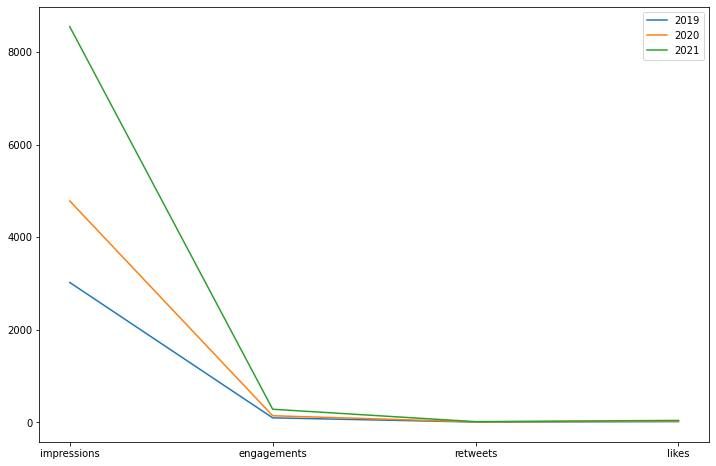

In [16]:
legends = ['2019', '2020', '2021']
mask_lst = [mask_2019, mask_2020, mask_2021]
check_lst = ['engagements', 'retweets', 'likes']

xticks = np.arange(0,len(check_lst))

fig, ax = plt.subplots(figsize=(12,8))
for i, year in enumerate(mask_lst):
    y_lst = []
    for col in check_lst:
        y = df[year][col].mean()
        y_lst.append(y)
    
    ax.plot(y_lst)
    ax.set_xticks(xticks)
    ax.set_xticklabels(check_lst, fontsize=10)
    ax.legend(labels=legends, loc='upper right', fontsize=10)


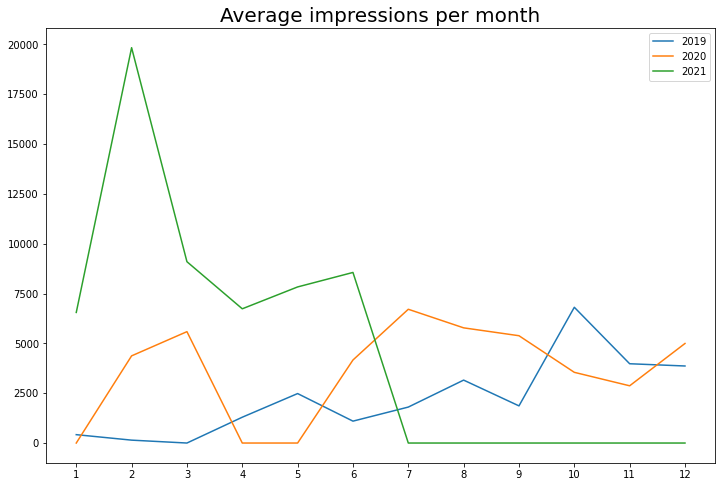

In [83]:
legends = ['2019', '2020', '2021']
mask_lst = [mask_2019, mask_2020, mask_2021]

xticks = np.arange(1,13)
fig, ax = plt.subplots(figsize=(12,8))
for i, year in enumerate(mask_lst):
    d = dict(df[year].groupby([df['time'].dt.month]).mean()['impressions'])
    for i in xticks:
        if i not in d:
            d[i] = 0
    d = dict(sorted(d.items()))
    ax.plot(d.values())
    ax.set_xticks(np.arange(0,12))
    ax.set_xticklabels(xticks, fontsize=10)
    ax.legend(labels=legends, loc='upper right', fontsize=10)
ax.set_title('Average impressions per month', fontsize=20);

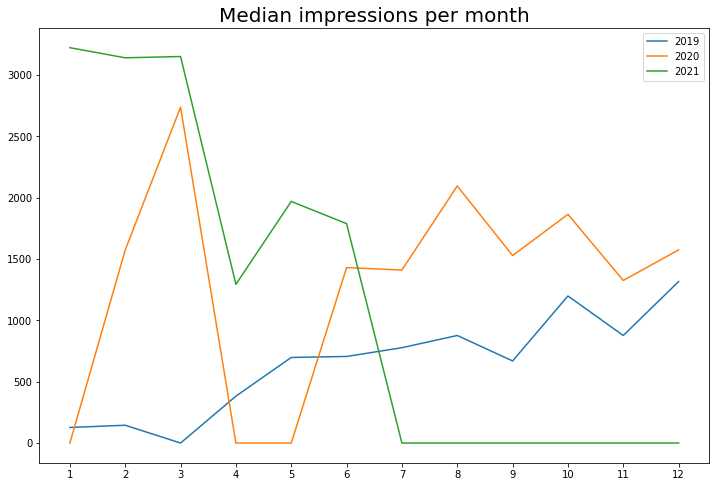

In [84]:
legends = ['2019', '2020', '2021']
mask_lst = [mask_2019, mask_2020, mask_2021]

xticks = np.arange(1,13)
fig, ax = plt.subplots(figsize=(12,8))
for i, year in enumerate(mask_lst):
    d = dict(df[year].groupby([df['time'].dt.month]).median()['impressions'])
    for i in xticks:
        if i not in d:
            d[i] = 0
    d = dict(sorted(d.items()))
    ax.plot(d.values())
    ax.set_xticks(np.arange(0,12))
    ax.set_xticklabels(xticks, fontsize=10)
    ax.legend(labels=legends, loc='upper right', fontsize=10)
ax.set_title('Median impressions per month', fontsize=20);